### SMS Spam Detection - Naive Bayes
Ahmad Sotoude <br>
<a href="https://github.com/ahmadsotoude">link to github</a>

This is a spam detecting model on a dataset from kaggle. Using Naive Bayes classification and some NLP. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

as you see, the dataset only has 2 columns v1 and v2 (v1:target, v2:data). So let's just get rid of null columns that we have.

In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let's put more meaningful labels for columns:

In [5]:
df.rename(columns={'v1': 'label', 'v2': 'text_message'}, inplace=True)

now we split the data on train and test sets, and then apply the count vectorizer and tfidf method on them

In [6]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

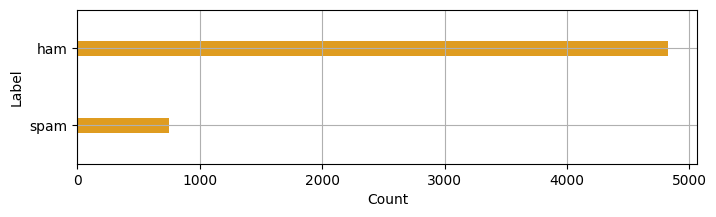

In [7]:
plt.figure(figsize=(8,2))
sns.countplot(y='label',color='orange',width=0.2,data=df)
plt.ylabel('Label')
plt.xlabel('Count')
plt.grid(True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['text_message']], df[['label']],test_size=0.2, random_state=0)

In [9]:
print('train data size: %i\ntest data size: %i' % (len(x_train),len(x_test)))

train data size: 4457
test data size: 1115


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [11]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train['text_message'])
print(count_vect.vocabulary_)

{'no': 4687, 'this': 6701, 'is': 3672, 'kallis': 3804, 'home': 3405, 'ground': 3189, 'amla': 906, 'town': 6850, 'durban': 2452, 'am': 898, 'in': 3565, 'escape': 2592, 'theatre': 6667, 'now': 4737, 'going': 3109, 'to': 6783, 'watch': 7238, 'kavalan': 3816, 'few': 2761, 'minutes': 4405, 'we': 7258, 'walked': 7202, 'from': 2959, 'my': 4563, 'moms': 4464, 'right': 5658, 'on': 4826, 'stagwood': 6294, 'pass': 4991, 'winterstone': 7375, 'left': 3978, 'victors': 7121, 'hill': 3361, 'address': 781, 'lt': 4158, 'gt': 3196, 'dunno': 2451, 'they': 6685, 'close': 1813, 'oredi': 4875, 'not': 4724, 'ma': 4199, 'fan': 2711, 'yo': 7540, 'im': 3539, 'by': 1553, 'work': 7433, 'its': 3688, 'ur': 7047, 'luck': 4163, 'love': 4138, 'someone': 6165, 'fortune': 2899, 'the': 6665, 'one': 4830, 'who': 7337, 'loves': 4146, 'but': 1539, 'he': 3297, 'also': 890, 'knows': 3872, 'about': 724, 'lunch': 4170, 'menu': 4354, 'only': 4836, 'da': 2116, 'know': 3869, 'oh': 4802, 'yeah': 7518, 'and': 924, 'diet': 2276, 'just

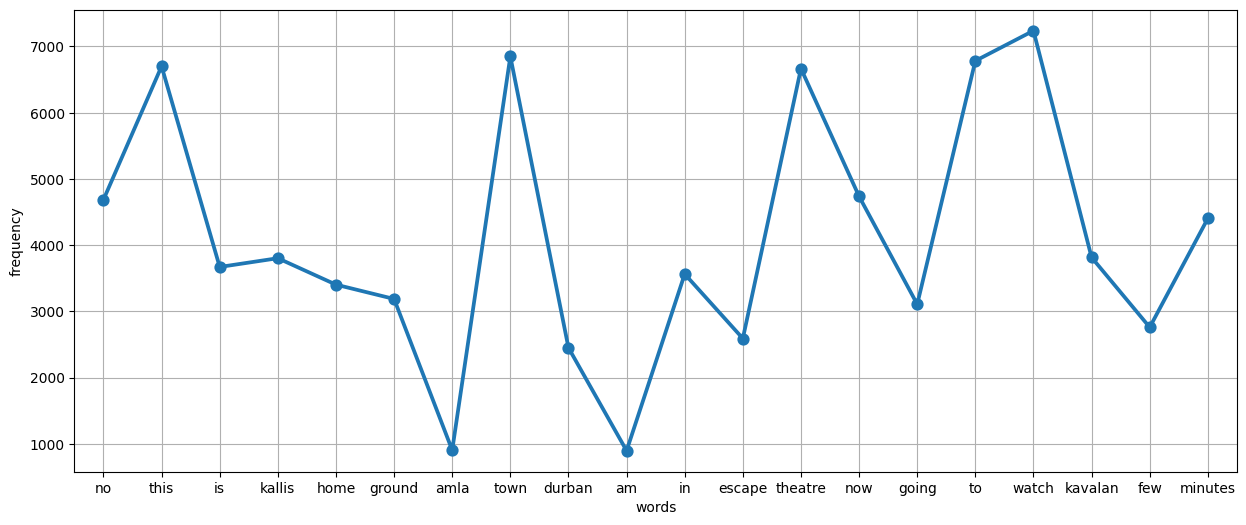

In [12]:
vocab = pd.DataFrame(list(count_vect.vocabulary_.items()), columns=['word', 'freq'])
plt.figure(figsize=(15,6))
sns.pointplot(x='word', y='freq', data=vocab[0:20])
plt.xlabel('words')
plt.ylabel('frequency')
plt.grid(True)
plt.show()


In [13]:
tfidf_trans = TfidfTransformer()
x_train_tfidf = tfidf_trans.fit_transform(x_train_counts)
print(x_train_counts)

  (0, 4687)	2
  (0, 6701)	1
  (0, 3672)	2
  (0, 3804)	1
  (0, 3405)	2
  (0, 3189)	1
  (0, 906)	1
  (0, 6850)	1
  (0, 2452)	1
  (1, 898)	1
  (1, 3565)	2
  (1, 2592)	1
  (1, 6667)	1
  (1, 4737)	1
  (1, 3109)	1
  (1, 6783)	1
  (1, 7238)	1
  (1, 3816)	1
  (1, 2761)	1
  (1, 4405)	1
  (2, 3672)	1
  (2, 7258)	1
  (2, 7202)	1
  (2, 2959)	1
  (2, 4563)	1
  :	:
  (4454, 5799)	1
  (4454, 3796)	1
  (4454, 2292)	1
  (4454, 4888)	1
  (4454, 7204)	1
  (4455, 7518)	1
  (4455, 7545)	1
  (4455, 3288)	1
  (4455, 4022)	1
  (4455, 2270)	1
  (4455, 4097)	1
  (4455, 5685)	1
  (4455, 4164)	1
  (4455, 6306)	1
  (4456, 6783)	2
  (4456, 7545)	3
  (4456, 3449)	1
  (4456, 6610)	1
  (4456, 814)	1
  (4456, 6552)	1
  (4456, 7423)	2
  (4456, 961)	1
  (4456, 3308)	1
  (4456, 2134)	1
  (4456, 6407)	1


Training the model:

In [14]:
model = MultinomialNB().fit(x_train_tfidf, y_train.label)

In [15]:
x_test_counts = count_vect.transform(x_test['text_message'])
x_test_tfidf = tfidf_trans.transform(x_test_counts)

In [16]:
pred = model.predict(x_test_tfidf)

In [17]:
type(pred)

numpy.ndarray

Checking the accuracy of model:

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y_test = np.asanyarray(y_test['label'])
pred = np.asanyarray(pred)
print(y_test)
print(pred)


['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [19]:
f1 = f1_score(y_test, pred, pos_label='spam')
acc = accuracy_score(y_test, pred)

print('f1-score: %0.2f' % f1)
print('accuracy score: %0.2f' % acc)

f1-score: 0.79
accuracy score: 0.95


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

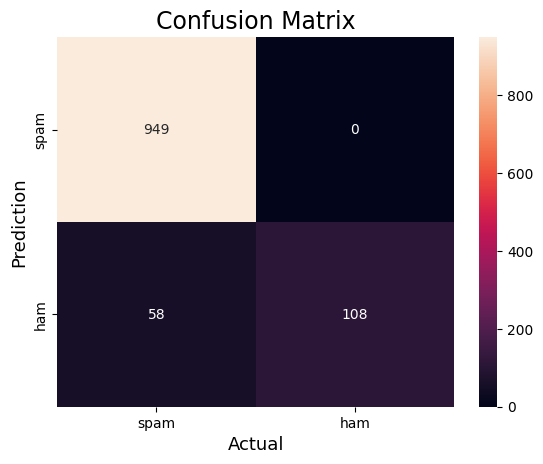

In [21]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['spam','ham'],
            yticklabels=['spam','ham'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

accuracy of 0.95 is good enough but the f1-score should improve to decrease error.
we can extract some features from the text messages which can help to detect spams better.

Length - usually the spam messages contain more characters:

In [22]:
df['len'] = df['text_message'].str.len()
df.head()

,label,text_message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Punctuations and special characters - spam messages contain more of these characters:

In [23]:
def count_punctuation(text):
    punctuation_marks = set('!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~')
    punctuation_count = sum(1 for char in text if char in punctuation_marks)
    return punctuation_count

df['punctuation_count'] = df['text_message'].apply(count_punctuation)
df.head()

,label,text_message,len,punctuation_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


Capital letters - spam messages contain more upper case letters to draw attention

In [24]:
def count_capital_letters(text):
    capital_count = sum(1 for char in text if char.isupper())
    return capital_count

df['capital_letter_count'] = df['text_message'].apply(count_capital_letters)
df.head()

,label,text_message,len,punctuation_count,capital_letter_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,3
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,10
3,ham,U dun say so early hor... U c already then say...,49,6,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,2


Digits - spam messages contain more digits(phone numbers, prices, ..)

In [25]:
def count_digits(text):
    digit_count = sum(1 for char in text if char.isdigit())
    return digit_count

df['digit_count'] = df['text_message'].apply(count_digits)
df.head()

,label,text_message,len,punctuation_count,capital_letter_count,digit_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,3,0
1,ham,Ok lar... Joking wif u oni...,29,6,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,10,25
3,ham,U dun say so early hor... U c already then say...,49,6,2,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,2,0


avg word len - spam messages' words usually are longer than normal txt messages

In [26]:
def average_word_length(text):
    words = text.split()
    total_length = sum(len(word) for word in words)
    if len(words) != 0:
        avg_length = round(total_length / len(words), 2)
    else:
        avg_length = 0
    return avg_length

df['average_word_length'] = df['text_message'].apply(average_word_length)
df.head()

,label,text_message,len,punctuation_count,capital_letter_count,digit_count,average_word_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,3,0,4.60
1,ham,Ok lar... Joking wif u oni...,29,6,2,0,4.00
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,10,25,4.57
3,ham,U dun say so early hor... U c already then say...,49,6,2,0,3.55
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,2,0,3.77


URLs - obviously spam messages have urls which you can hardly find in normal messages

In [27]:
import re
def count_urls(text):
    url_pattern = r'https?://\S+'
    urls = re.findall(url_pattern, text)
    url_count = len(urls)
    return url_count

df['url_count'] = df['text_message'].apply(count_urls)


Let's see the correlation of the new features we added with the label

In [28]:
ndf = df.copy()
ndf.loc[ndf['label'] == 'ham', 'label'] = 0
ndf.loc[ndf['label'] == 'spam', 'label'] = 1

In [29]:
ndf.drop('text_message',axis=1).corr()

,label,len,punctuation_count,capital_letter_count,digit_count,average_word_length,url_count
label,1.000000,0.385234,0.127509,0.351080,0.843589,0.236323,0.148662
len,0.385234,1.000000,0.635109,0.385829,0.389473,0.080392,0.051943
punctuation_count,0.127509,0.635109,1.000000,0.256345,0.164070,0.168635,0.078151
capital_letter_count,0.351080,0.385829,0.256345,1.000000,0.356669,0.092411,0.052984
digit_count,0.843589,0.389473,0.164070,0.356669,1.000000,0.224816,0.024127
average_word_length,0.236323,0.080392,0.168635,0.092411,0.224816,1.000000,0.115827
url_count,0.148662,0.051943,0.078151,0.052984,0.024127,0.115827,1.000000


now we do the tfidf method and train the model again:

In [31]:
count_vect = CountVectorizer()
x_counts = count_vect.fit_transform(df['text_message'])

tfidf_trans = TfidfTransformer()
x_tfidf = tfidf_trans.fit_transform(x_counts)

In [32]:
from scipy.sparse import hstack
concatenated_features = hstack([x_tfidf, df.drop(['label','text_message'], axis=1)])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(concatenated_features, df[['label']],test_size=0.2, random_state=0)

In [34]:
model = MultinomialNB().fit(x_train, y_train)
pred = model.predict(x_test)
f1 = f1_score(y_test, pred, pos_label='spam')
acc = accuracy_score(y_test, pred)

print('f1-score: %0.2f' % f1)
print('accuracy score: %0.2f' % acc)

f1-score: 0.82
accuracy score: 0.94


c:\Users\SAM-Tech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


as you see the f1-score has improved

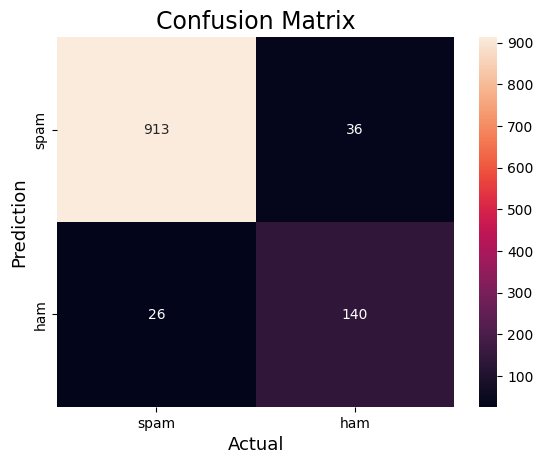

In [35]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['spam','ham'],
            yticklabels=['spam','ham'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()